# **Household Electric Power Consumption - Time Series Analysis**

> [**Kaggle Dataset**](https://www.kaggle.com/uciml/electric-power-consumption-data-set)

In [ ]:
# Install Kaggle.
!pip install --upgrade --force-reinstall --no-deps kaggle

In [ ]:
# Files Upload.
from google.colab import files

files.upload()

In [ ]:
# Create a Kaggle Folder.
!mkdir ~/.kaggle

# Copy the kaggle.json to the folder created.
!cp kaggle.json ~/.kaggle/

# Permission for the json file to act.
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Dataset Download.
!kaggle datasets download -d uciml/electric-power-consumption-data-set

In [ ]:
# Unzip Dataset.
!unzip electric-power-consumption-data-set.zip

## **Household Electric Power Consumption Forecasting using Stacked LSTM.**

*The original LSTM model consists of a single hidden LSTM layer followed by a standard feedforward output layer. The stacked LSTM is an extension to this model that has multiple hidden LSTM layers where each layer contains multiple memory cells. The stacked LSTM hidden layers make the model deeper, more accurately earning the description as a deep learning technique. It is the depth of neural networks that is attributed to the approach's success on various challenging prediction problems. The stacked LSTM is now a stable technique for challenging sequence prediction problems. An LSTM model with many LSTM layers is a stacked LSTM architecture. An LSTM layer provides a sequence output rather than a single value output. Stacked LSTMs are now a stable technique for challenging sequence prediction problems.*

#### **Stacked LSTMs Architecture.**

A Stacked LSTM architecture can be defined as an LSTM model comprised of multiple LSTM layers. 

**<center>$Input \rightarrow LSTM \rightarrow LSTM \rightarrow LSTM \rightarrow Dense \rightarrow Output$</center>**

In [ ]:
# Import Library.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
plt.style.use("fivethirtyeight")
from tensorflow import keras
import warnings

warnings.filterwarnings("ignore")

# Import Dataset.
data = pd.read_csv(
    "household_power_consumption.txt",
    sep=";",
    parse_dates={"date_time": ["Date", "Time"]},
    infer_datetime_format=True,
    low_memory=False,
    na_values=["nan", "?"],
    index_col="date_time",
)

data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
date_time,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


### **Dataset Information.**

*   **date:** Date in format dd/mm/yyyy
*   **time:** Time in format hh:mm:ss
*   **global_active_power:** Household global minute-averaged active power (in kilowatt).
*   **global_reactive_power:** Household global minute-averaged reactive power (in kilowatt).
*   **voltage:** minute-averaged voltage (in volt).
*   **global_intensity:** Household global minute-averaged current intensity (in ampere).
*   **sub_metering_1:** Energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven, and a microwave (hot plates are not electric but gas-powered).
*   **sub_metering_2:** Energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing machine, a tumble-drier, a refrigerator, and a light.
*   **sub_metering_3:** Energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water heater and an AC.

In [ ]:
# Dataset Information.
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


In [ ]:
# Missing Values.
data.isna().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [ ]:
# Fill missing values by the value of one day before.
def fill_missing(data):
    one_day = 23 * 60
    for row in range(data.shape[0]):
        for col in range(data.shape[1]):
            if np.isnan(data[row, col]):
                data[row, col] = data[row - one_day, col]


fill_missing(data.values)

# No Missing Values.
data.isna().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [ ]:
data.to_csv("household_power_consumption.csv")

# Load Dataset.
data = pd.read_csv(
    "household_power_consumption.csv", parse_dates=["date_time"], index_col="date_time"
)
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
date_time,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


## **Exploratory Data Visualization**

In [ ]:
# Resample Dataset.
data = data.resample("D").sum()

In [ ]:
# Plot Active Power per Features.
fig, ax = plt.subplots(figsize=(18, 12))

for i in range(len(data.columns)):
    plt.subplot(len(data.columns), 1, i + 1)
    name = data.columns[i]
    plt.plot(data[name])
    plt.title(name, y=0, loc="right")
    plt.yticks([])

plt.show()
fig.tight_layout()

In [ ]:
# Plot Active Power per Year.
years = ["2007", "2008", "2009", "2010"]
fig, ax = plt.subplots(figsize=(18, 12))

for i in range(len(years)):
    plt.subplot(len(data.columns), 1, i + 1)
    year = years[i]
    active_power_data = data[str(year)]["Global_active_power"]
    plt.plot(active_power_data)
    plt.title(
        str(year) + " > " + str(np.round(active_power_data.sum(), 1)), y=0, loc="left"
    )

plt.show()
fig.tight_layout()

In [ ]:
# Per Year Data Visualisation (Global Active Power).
years = ["2007", "2008", "2009", "2010"]
fig, ax = plt.subplots(figsize=(18, 12))

for i in range(len(years)):
    plt.subplot(len(data.columns), 1, i + 1)
    year = years[i]
    active_power_data = data[str(year)]["Global_active_power"]
    active_power_data.hist(bins=200)
    plt.title(
        str(year) + " > " + str(np.round(active_power_data.sum(), 1)), y=0, loc="left"
    )

plt.show()
fig.tight_layout()

In [ ]:
fig, ax = plt.subplots(figsize=(18, 12))

for i in range(len(data.columns)):
    plt.subplot(len(data.columns), 1, i + 1)
    name = data.columns[i]
    data[name].hist(bins=200)
    plt.title(name, y=0, loc="right")
    plt.yticks([])

plt.show()
fig.tight_layout()

In [ ]:
# Plot Power Consumption per month in 2007.
months = [i for i in range(1, 13)]
fig, ax = plt.subplots(figsize=(18, 22))

for i in range(len(months)):
    ax = plt.subplot(len(months), 1, i + 1)
    month = "2007-" + str(months[i])
    active_power = data[month].Global_active_power
    sns.distplot(active_power, kde=True)
    plt.title(month + " " + str(np.round(active_power.sum(), 1)), loc="left")

plt.show()
fig.tight_layout(pad=5)

## **Prediction Goals**

*   Forecast hourly power consumption for the next day.
*   Forecast daily power consumption for the next week.
*   Forecast weekly power consumption for the next month.
*   Forecast monthly power consumption for the next year.

### **Prepare the Dataset in LSTM format (Multivariate LSTM Model).**

In [ ]:
# Split Dataset into Feature and Target Set.
data_ = data["Global_active_power"]
data_test = data_["2010"]
data_train = data_.loc[:"2009-12-31"]

# Split Dataset into Training and Test Data.
X_train, y_train = [], []

for i in range(21, len(data_train) - 7):
    X_train.append(data_train[i - 21 : i])
    y_train.append(data_train[i : i + 7])

X_train, y_train = np.array(X_train), np.array(y_train)

print(X_train.shape, y_train.shape)

# Feature Scaling.
from sklearn.preprocessing import MinMaxScaler

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
X_train = scaler_x.fit_transform(X_train)
y_train = scaler_y.fit_transform(y_train)

(1084, 21) (1084, 7)


In [ ]:
# Convert training and test data into LSTM Format - Reshape input to be [samples, time steps, features] for LSTM.
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
y_train = y_train.reshape(y_train.shape[0], y_train.shape[1])

# Validation Dataset.
X_valid = X_train[:10]
y_valid = y_train[:10]
X_train = X_train[10:]
y_train = y_train[10:]

print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)

(1074, 21, 1) (10, 21, 1) (1074, 7) (10, 7)


## **Build the LSTM Model (Vector Output Model).**

We need to shape $x\_input$ into a 3D dimension for LSTM, and the output will be in the shape of ($timesteps$, $nos\_of\_features$). This particular architecture is called **Vector Output Model**.

> [**Differences Between Bidirectional and Unidirectional LSTM**](https://www.baeldung.com/cs/bidirectional-vs-unidirectional-lstm)

## **Bi-directional LSTM**

**Bidirectional LSTM** (BiLSTM) is a recurrent neural network used primarily on natural language processing. Unlike standard LSTM, the input flows in both directions and utilizes information from both sides. It's also a powerful tool for modeling the sequential dependencies between words and phrases in both directions of the sequence.

In summary, **BiLSTM** adds one more LSTM layer that reverses the direction of information flow. That is, the input sequence flows backward in the additional LSTM layer. Then we combine the outputs from both LSTM layers in several ways, such as average, sum, multiplication, or concatenation.

**To illustrate, the unrolled BiLSTM is presented in the figure below:**

![BiLSTM.png](https://www.baeldung.com/wp-content/uploads/sites/4/2022/01/bilstm-1.png)

***We implement a Bidirectional LSTM for univariate time series forecasting by wrapping the first hidden layer in a wrapper layer called Bidirectional.***



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    LSTM,
    Bidirectional,
    Dropout,
    LayerNormalization,
)

# Create a Stacked Uni-directional LSTM.
def model_lstm():
    model = Sequential()
    model.add(
        LSTM(
            200,
            return_sequences=True,
            activation="tanh",
            input_shape=(X_train.shape[1], 1),
        )
    )
    model.add(LayerNormalization())
    model.add(LSTM(100))
    model.add(Dropout(0.25))
    model.add(LayerNormalization())
    model.add(Dense(7))
    # Fit the Model.
    model.compile(optimizer="adam", loss="mse", metrics=["accuracy"])
    return model


"""
In sequence prediction problems, it is beneficial to allow the LSTM model to learn the input sequence in both forward 
and backward directions and then concatenate both interpretations. This technique is called a Bidirectional LSTM.
"""

# Create a Stacked Bi-directional LSTM.
def model_bilstm():
    model = Sequential()
    model.add(
        Bidirectional(
            LSTM(200, activation="tanh", return_sequences=True),
            input_shape=(X_train.shape[1], 1),
        )
    )
    model.add(LayerNormalization())
    model.add(LSTM(100))
    model.add(Dropout(0.25))
    model.add(LayerNormalization())
    model.add(Dense(7))
    # Fit the Model.
    model.compile(optimizer="adam", loss="mse", metrics=["accuracy"])
    return model

In [ ]:
# Call the LSTM Model.
lstm = model_lstm()

# Model Summary.
print(lstm.summary())

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

callbacks = [
    EarlyStopping(patience=20, verbose=1),
    ReduceLROnPlateau(factor=0.1, patience=20, min_lr=0.00001, verbose=1),
    ModelCheckpoint("lstm.h5", verbose=1, save_best_only=True),
]

# Fit the Model.
history_lstm = lstm.fit(
    X_train,
    y_train,
    epochs=100,
    validation_data=(X_valid, y_valid),
    batch_size=32,
    callbacks=callbacks,
)

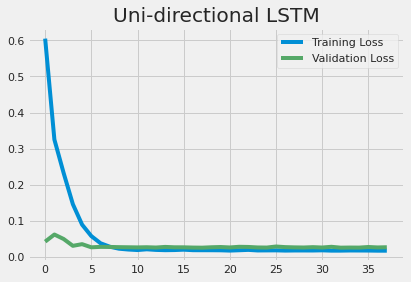

In [ ]:
# Plot Training and Validation Loss.
loss = history_lstm.history["loss"]
val_loss = history_lstm.history["val_loss"]
epochs = len(loss)
plt.plot(np.arange(epochs), loss, label="Training Loss")
plt.plot(np.arange(epochs), val_loss, "g", label="Validation Loss")
plt.title("Uni-directional LSTM")
plt.legend()
plt.show()

In [ ]:
# Load Model.
lstm = keras.models.load_model("lstm.h5")
lstm.summary()

In [ ]:
# Call the Bidirectional LSTM Model.
bi_lstm = model_bilstm()

# Model Summary.
print(bi_lstm.summary())

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

callbacks = [
    EarlyStopping(patience=20, verbose=1),
    ReduceLROnPlateau(factor=0.1, patience=20, min_lr=0.00001, verbose=1),
    ModelCheckpoint("bi_lstm.h5", verbose=1, save_best_only=True),
]

# Fit the Model.
history_bilstm = bi_lstm.fit(
    X_train,
    y_train,
    epochs=100,
    validation_data=(X_valid, y_valid),
    batch_size=32,
    callbacks=callbacks,
)

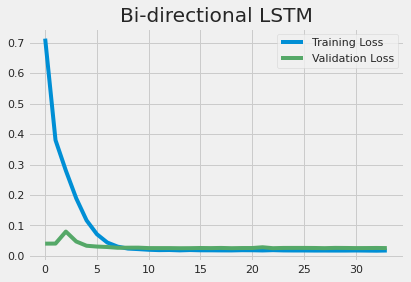

In [ ]:
# Plot Training and Validation Loss.
loss = history_bilstm.history["loss"]
val_loss = history_bilstm.history["val_loss"]
epochs = len(loss)
plt.plot(np.arange(epochs), loss, label="Training Loss")
plt.plot(np.arange(epochs), val_loss, "g", label="Validation Loss")
plt.title("Bi-directional LSTM")
plt.legend()
plt.show()

In [ ]:
# Load Model.
bi_lstm = keras.models.load_model("bi_lstm.h5")
bi_lstm.summary()

### **Prepare the Test Dataset for Prediction Result.**

In [ ]:
X_test, y_test = [], []

for i in range(21, len(data_test) - 7):
    X_test.append(data_test[i - 21 : i])
    y_test.append(data_test[i : i + 7])

X_test, y_test = np.array(X_test), np.array(y_test)

# Feature Scaling.
X_test = scaler_x.transform(X_test)

# Convert the Test Data into LSTM format.
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

print(X_test.shape, y_test.shape)

# Prediction on the Test Set.
y_pred_uni = scaler_y.inverse_transform(lstm.predict((X_test)))
y_pred_bi = scaler_y.inverse_transform(bi_lstm.predict((X_test)))

(302, 21, 1) (302, 7)


In [ ]:
# Plot the Prediction Result.
fig, ax = plt.subplots(figsize=(16, 8))
plt.plot(y_test[:, 1])
plt.plot(y_pred_uni[:, 1])
plt.title("Uni-directional LSTM")
plt.show()

In [ ]:
# Plot the Prediction Result.
fig, ax = plt.subplots(figsize=(16, 8))
plt.plot(y_test[:, 1])
plt.plot(y_pred_bi[:, 1])
plt.title("Bi-directional LSTM")
plt.show()

### **Model Performance.**

In [ ]:
from sklearn import metrics


def evaluate_performace(y_true, y_pred):
    scores = []
    # Calculate Scores per day.
    for i in range(y_true.shape[1]):
        mse = metrics.mean_squared_error(y_true[:, 1], y_pred[:, 1])
        rmse = np.sqrt(mse)
        scores.append(rmse)

    # Calculate the Score for the entire prediction.
    total_score = 0
    for row in range(y_true.shape[0]):
        for col in range(y_pred.shape[1]):
            total_score = total_score + (y_true[row, col] - y_pred[row, col]) ** 2
    total_score = np.sqrt(total_score / (y_true.shape[0] * y_pred.shape[1]))
    return (total_score, scores)


print("RMSE in Uni-directional Stacked LSTM:", evaluate_performace(y_test, y_pred_bi)[0])
print("RMSE in Bi-directional Stacked LSTM:", evaluate_performace(y_test, y_pred_bi)[0])
print("Standard Deviation of Actual Values:", np.std(y_test[:, 0]))

# Since the Standard Deviation of actual values is more than the RMSE value, we can say that both models are good.

RMSE in Uni-directional Stacked LSTM: 377.36100466384534
RMSE in Bi-directional Stacked LSTM: 377.36100466384534
Standard Deviation of Actual Values: 473.3168314954531
